<a href="https://colab.research.google.com/github/ireneow-happy/ml_google/blob/main/GradientDescent_3D(colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

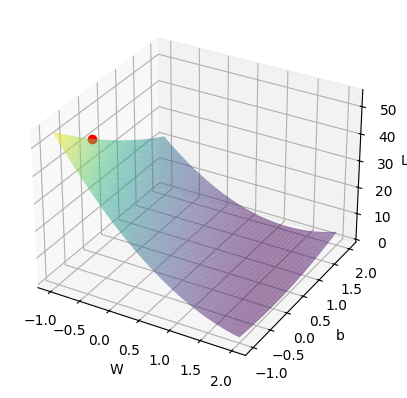

In [1]:
# Gradient Descent on 3D loss Surface
#這個Notebook展示了在一個簡單線性模型中, 如何同時調整權重W和偏差b, 使用梯度下降法最小化Loss.
# 安裝必要模組（如果你已經有就可以略過）

# 匯入模組
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# 建立 Loss function（這裡是簡單的 MSE）
def loss(W, b):
    return (W * x + b - y)**2

# 模擬資料點
x = np.array([1, 2, 3])
y = np.array([2, 4, 6])

# 建立損失函數圖形
W_vals = np.linspace(-1, 2, 50)
b_vals = np.linspace(-1, 2, 50)
W_grid, b_grid = np.meshgrid(W_vals, b_vals)
Loss_grid = np.zeros_like(W_grid)

for i in range(W_grid.shape[0]):
    for j in range(W_grid.shape[1]):
        Loss_grid[i, j] = np.mean(loss(W_grid[i, j], b_grid[i, j]))

# 梯度函數
def grad(W, b):
    dW = 2 * np.mean((W * x + b - y) * x)
    db = 2 * np.mean(W * x + b - y)
    return dW, db

# 執行梯度下降
W, b = -1.0, 0.0
lr = 0.1
W_path, b_path, loss_path = [W], [b], [np.mean(loss(W, b))]
for _ in range(15):
    dW, db = grad(W, b)
    W -= lr * dW
    b -= lr * db
    W_path.append(W)
    b_path.append(b)
    loss_path.append(np.mean(loss(W, b)))

# 建立動畫
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W_grid, b_grid, Loss_grid, alpha=0.5, cmap='viridis')
line, = ax.plot([], [], [], 'ro-', lw=2)
ax.set_xlabel('W')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

def update(i):
    line.set_data(W_path[:i+1], b_path[:i+1])
    line.set_3d_properties(loss_path[:i+1])
    return line,

ani = FuncAnimation(fig, update, frames=len(W_path), interval=500, blit=False)

# 在 Colab 中顯示動畫
HTML(ani.to_jshtml())
